Реализуем градиентный спуск для задачи поиска оптимальных коэффициентов в MSE регрессии!

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Имеем 1000 объектов и 10 признаков у каждого (+таргет)!

Обучим модель линейной регрессии:

$$
a(x) = \beta_1 d_{1} + \beta_2 d_{2} + \beta_3 d_{3} + \beta_4 d_{4} + \beta_5 d_{5} + \beta_6 d_{6} + \beta_7 d_{7} + \beta_8 d_{8} + \beta_9 d_{9} + \beta_{10} d_{10} + \beta_0
$$

Которая минимизирует MSE:

$$
Q(a(X), Y) = \sum_i^{1000} (a(x_i) - y_i)^2
$$

In [54]:
data = pd.read_csv('data.csv')

data.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,target
0,0.113768,0.930064,0.330528,0.010987,0.265703,0.699462,0.058465,0.431643,0.650958,0.751820,30.147094
1,0.380048,0.485946,0.870232,0.473401,0.454516,0.500864,0.471723,0.234329,0.072982,0.008372,21.424402
2,0.768462,0.217706,0.727438,0.718377,0.452155,0.434638,0.043989,0.972489,0.450133,0.378157,31.422056
3,0.606637,0.604335,0.540332,0.491236,0.325632,0.206348,0.825767,0.332475,0.955518,0.162811,31.308588
4,0.119770,0.469718,0.632829,0.504207,0.238259,0.452457,0.775360,0.174262,0.117621,0.218883,23.322751


Обучим коэффициенты линейной регрессии с помощью библиотеки <a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html"> **sklearn** </a>

Отдельно выведем оценку свободного коэффициента  ($\beta_0$ при $d_0 = 1$)

In [70]:
from sklearn.linear_model import LinearRegression

### Your code is here
X = data.drop("target", axis = 1)
Y = data["target"]
model = LinearRegression()
model.fit(X, Y)

LinearRegression()

In [71]:
Y

0      30.147094
1      21.424402
2      31.422056
3      31.308588
4      23.322751
         ...    
995    32.910569
996    27.457300
997    32.980881
998    34.254264
999    28.633255
Name: target, Length: 1000, dtype: float64

In [72]:
model.coef_

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

In [73]:
model.intercept_

4.3731570387071095

In [49]:
import numpy as np

# Пример случайных данных
np.random.seed(42)
samples = np.random.rand(5, 3)  # Пример: 5 наблюдений, 3 признака
shift = np.array([1, 2, 3])  # Пример: коэффициенты
f_st = np.array([0.5, 1.5, 2.5])  # Пример: коэффициенты

# Первое выражение
result_1 = 2 * np.dot(shift.reshape(1, -1), samples.T) / samples.shape[0]

# Второе выражение
result_2 = np.mean(2 * np.dot(f_st, samples.T))

print("Результат первого выражения:")
print(result_1)

print("\nРезультат второго выражения:")
print(result_2)

# Проверка различий
if np.allclose(result_1, result_2):
    print("\nРезультаты идентичны.")
else:
    print("\nЕсть различия в результатах.")


Результат первого выражения:
[[1.78878022 0.55147173 1.43751238 1.46358845 0.72103831]]

Результат второго выражения:
4.478697398582545

Есть различия в результатах.


Теперь вам необходимо реализовать класс для оптимизации коэффициентов линейной регрессии МНК.
Подразумевается, что на вход алгоритм будет принимать следующие параметры:

- 2 pandas датафрейма **samples** и **targets**, содержащих матрицу объектов и ветор ответов соответственно
- значение **learning rate**, который корректирует длину вектора-градиента (чтобы он не взорвался)
- значение **threshold**'а для критерия останова (когда мы считаем, что мы сошлись к оптимуму)
- параметр **copy**, который позволяет либо делать изменения in-place в датафрейме, подающимся в класс, если изменения матрицы объектов в принципе при обучении имеются. Или же копировать объект при инициализации класса и возвращать новый объект, если требуется.

Он будет состоять из следующих важных компонент-методов:

- **add_constant_feature**: добавляет колонку с названием *constant* из единичек к переданному датафрейму **samples**. Это позволяет оценить свободный коэффициент $\beta_0$.

- **calculate_mse_loss**: вычисляет при текущих весах **self.beta** значение среднеквадратической ошибки.

- **calculate_gradient**: вычисляет при текущих весах вектор-градиент по функционалу.

- **iteration**: производит итерацию градиентного спуска, то есть обновляет веса модели, в соответствии с установленным **learning_rate = $\eta$**: $\beta^{(n+1)} = \beta^{(n)} - \eta \cdot \nabla Q(\beta^{(n)})$

- **learn**: производит итерации обучения до того момента, пока не сработает критерий останова обучения. В этот раз критерием останова будет следующее событие: во время крайней итерации изменение в функционале качества модели составило значение меньшее, чем **self.threshold**. Иными словами, $|Q(\beta^{(n)}) - Q(\beta^{(n+1)})| < threshold$.

P.S. установите в **__init__** аттрибут экземпляра с названием **iteration_loss_dict**, который будет устроен следующим образом: на каждой итерации мы будем добавлять в словарь пару ключ-значение, где ключем будет номер итерации $n$, а значением - среднеквадратическая ошибка в точке $\beta^{(n)}$. Это пригодится нам в будущем для визуализации.

### Hint: пример вычисления производной


$$
Q(a, X) = \frac{1}{N}\cdot\sum_{i=1}^N (\beta_1 \cdot d_{i1} + ... + \beta_n \cdot d_{in} - y_i)^2
$$

Выше - минимизируемая функция. Она зависит от n переменных: $\beta_1, ..., \beta_n$. Вектор-градиент - матрица с одной строчкой, состоящей из производных 1го порядка по всем переменным.

$$
\nabla Q(a, X) = (Q'_{\beta_1} \;\;\; Q'_{\beta_2} \;\;\; ... \;\;\; Q'_{\beta_{n-1}}  \;\;\;  Q'_{\beta_n})
$$

Пример вычисления производной по первой переменной:

$$
Q'_{\beta_1} = \frac{2}{N} \cdot \sum_{i=1}^N d_{i1} (\beta_1 \cdot d_{i1} + ... + \beta_{n} \cdot d_{in} - y_i)
$$

Скажем, для нашего датасета X, Y вычислим эту саму производную при начальных единичных коэффициентах $\beta_{start} = (1 \;\;\; 1 \;\;\; ...)$

Получим для каждого объекта в начале выражение из скобочек: 
$$
\beta_1 \cdot d_{i1} + ... + \beta_{n} \cdot d_{in} - y_i
$$

In [74]:
### Инициализируем точку для коэффициентов в виде вектора из единичек
initial_betas = np.ones(X.shape[1])

### Получим выражение выше для каждого объекта.
### Для этого скалярно перемножим строчки из X на наши beta

scalar_value = np.dot(X, initial_betas.reshape(-1, 1)).ravel()
scalar_value = (scalar_value - Y).values

Теперь полученное значение для каждого объекта умножим на соответствующее значение признака $d_1$:

$$
d_{i1} \cdot (\beta_1 \cdot d_{i1} + ... + \beta_{n} \cdot d_{in} - y_i)
$$

In [75]:
### Возьмем столбик со значениями 1 признака

d_i1 = X.values[:, 0]

### Умножим каждый объект на соответствующее значение признака
scalar_value = scalar_value * d_i1

In [76]:
### Наконец, умножим все на 2 и усреднимся, чтобы получить значение производной по первому параметру

2 * np.mean(scalar_value)

-27.62384887912409

### Эта логика поможем Вам при реализации класса!

learn(self)

метод возвращает итоговую среднеквадратическую ошибку.
метод итеративно вычисляет среднеквадратическую ошибку и вектор-градиент. номер итерации и MSE записываются в словарь *iteration_loss_dict*. критерий останова срабатывает тогда, когда абсолютное значение разницы двух последних MSE меньше *self.threshold*.

In [91]:
class GradientDescentMse:
    """
    Базовый класс для реализации градиентного спуска в задаче линейной МНК регрессии 
    """

    def __init__(self, samples: pd.DataFrame, targets: pd.DataFrame,
                 learning_rate: float = 1e-3, threshold = 1e-6, copy: bool = True):
        """
        self.samples - матрица признаков
        self.targets - вектор таргетов
        self.beta - вектор из изначальными весами модели == коэффициентами бета (состоит из единиц)
        self.learning_rate - параметр *learning_rate* для корректировки нормы градиента
        self.threshold - величина, меньше которой изменение в loss-функции означает остановку градиентного спуска
        iteration_loss_dict - словарь, который будет хранить номер итерации и соответствующую MSE
        copy: копирование матрицы признаков или создание изменения in-place
        """
        ### Your code is here
        self.samples = samples
        self.targets = targets
        self.beta = np.ones(self.samples.shape[1])
        self.learning_rate=learning_rate
        self.threshold = threshold
        self.iteration_loss_dict = {}
        if copy:
            self.samples = samples.copy()
        else:
            self.samples = samples
            
        self.iteration_num = 0
        
    def add_constant_feature(self):
        """
        Метод для создания константной фичи в матрице объектов samples
        Метод создает колонку с константным признаком (interсept) в матрице признаков.
        Hint: так как количество признаков увеличилось на одну, не забудьте дополнить вектор с изначальными весами модели!
        """
        ### Your code is here
        self.samples["costant"] = 1
        self.beta = np.append(self.beta, 1)

        
    def calculate_mse_loss(self) -> float:
        """
        Метод для расчета среднеквадратической ошибки
        
        :return: среднеквадратическая ошибка при текущих весах модели: float
        """
        ### Your code is here
        loss = np.dot(self.samples, self.beta) - self.targets
        return np.mean(loss**2)

    def calculate_gradient(self) -> np.ndarray:
        """
        Метод для вычисления вектора-градиента
        Метод возвращает вектор-градиент, содержащий производные по каждому признаку.
        Сначала матрица признаков скалярно перемножается на вектор self.beta, и из каждой колонки
        полученной матрицы вычитается вектор таргетов. Затем полученная матрица скалярно умножается на матрицу признаков.
        Наконец, итоговая матрица умножается на 2 и усредняется по каждому признаку.
        
        :return: вектор-градиент, т.е. массив, содержащий соответствующее количество производных по каждой переменной: np.ndarray
        """
        first_matrix = np.dot(self.samples, self.beta)  - self.targets.values
        return 2 * np.dot(first_matrix, self.samples) / self.samples.shape[0]

    
    def iteration(self):
        """
        Обновляем веса модели в соответствии с текущим вектором-градиентом
        """
        ### Your code is here
        self.beta = self.beta - self.learning_rate * self.calculate_gradient()

        
    def learn(self):
        """
        Итеративное обучение весов модели до срабатывания критерия останова
        Запись mse и номера итерации в iteration_loss_dict
        
        Описание алгоритма работы для изменения бет:
            Фиксируем текущие beta -> start_betas
            Делаем шаг градиентного спуска
            Записываем новые beta -> new_betas
            Пока |L(new_beta) - L(start_beta)| > threshold:
                Повторяем первые 3 шага
                
        Описание алгоритма работы для изменения функции потерь:
            Фиксируем текущие mse -> previous_mse
            Делаем шаг градиентного спуска
            Записываем новые mse -> next_mse
            Пока |(previous_mse) - (next_mse)| > threshold:
                Повторяем первые 3 шага
        """
        # ### Your code is here
        # start_betas = self.beta
        # self.iteration()
        # new_betas = self.beta
        # while abs(len(new_betas) - len(start_betas))> self.threshold:
        #     start_betas = new_betas
        #     self.iteration()
        #     new_betas = self.beta
        #     self.iteration_loss_dict[self.iteration_num+1] = new_betas
        #     self.iteration_num += 1
        
        
        
        
        previous_mse = self.calculate_mse_loss()
        self.iteration()
        next_mse = self.calculate_mse_loss()
        self.iteration_loss_dict[0] = previous_mse
        self.iteration_loss_dict[1] = next_mse
        
        self.iteration_num = 1
        
        while abs(previous_mse - next_mse) >= self.threshold:
            previous_mse = next_mse
            self.iteration()
            next_mse = self.calculate_mse_loss()
            self.iteration_loss_dict[self.iteration_num+1] = next_mse
            self.iteration_num += 1


Обучим коэффициенты линейной модели с помощью реализованного нами градиентного спуска, не забыв добавить свободную переменную. Получились ли такие же коэффициенты, как и при использовании **LinearRegression** из **sklearn**? Если нет, то почему они отличаются, на Ваш взгляд, и сильно ли?

In [92]:
GD = GradientDescentMse(samples=X, targets=Y)
GD.add_constant_feature()
GD.learn()

In [85]:
print('Веса модели при переменных d1, d2, ..., d10 равны соответственно: \n\n' + str(GD.beta))

Веса модели при переменных d1, d2, ..., d10 равны соответственно: 

[0.88733305 1.90100713 2.88063607 3.87662612 4.89623507 5.89126182
 6.89254811 7.90311947 8.87580109 9.86109585 4.94854733]


Попробуйте теперь изменить значения **learning_rate** и/или **threshold**. Например, установите длину шага $\eta = 1$. Что произошло и почему такое возможно?

In [95]:
class GradientDescentMse1:
    """
    Базовый класс для реализации градиентного спуска в задаче линейной МНК регрессии 
    """

    def __init__(self, samples: pd.DataFrame, targets: pd.DataFrame,
                 learning_rate: float = 1, threshold = 1e-6, copy: bool = True):
        """
        self.samples - матрица признаков
        self.targets - вектор таргетов
        self.beta - вектор из изначальными весами модели == коэффициентами бета (состоит из единиц)
        self.learning_rate - параметр *learning_rate* для корректировки нормы градиента
        self.threshold - величина, меньше которой изменение в loss-функции означает остановку градиентного спуска
        iteration_loss_dict - словарь, который будет хранить номер итерации и соответствующую MSE
        copy: копирование матрицы признаков или создание изменения in-place
        """
        ### Your code is here
        self.samples = samples
        self.targets = targets
        self.beta = np.ones(self.samples.shape[1])
        self.learning_rate=learning_rate
        self.threshold = threshold
        self.iteration_loss_dict = {}
        if copy:
            self.samples = samples.copy()
        else:
            self.samples = samples
            
        self.iteration_num = 0
        
    def add_constant_feature(self):
        """
        Метод для создания константной фичи в матрице объектов samples
        Метод создает колонку с константным признаком (interсept) в матрице признаков.
        Hint: так как количество признаков увеличилось на одну, не забудьте дополнить вектор с изначальными весами модели!
        """
        ### Your code is here
        self.samples["costant"] = 1
        self.beta = np.append(self.beta, 1)

        
    def calculate_mse_loss(self) -> float:
        """
        Метод для расчета среднеквадратической ошибки
        
        :return: среднеквадратическая ошибка при текущих весах модели: float
        """
        ### Your code is here
        loss = np.dot(self.samples, self.beta) - self.targets
        return np.mean(loss**2)

    def calculate_gradient(self) -> np.ndarray:
        """
        Метод для вычисления вектора-градиента
        Метод возвращает вектор-градиент, содержащий производные по каждому признаку.
        Сначала матрица признаков скалярно перемножается на вектор self.beta, и из каждой колонки
        полученной матрицы вычитается вектор таргетов. Затем полученная матрица скалярно умножается на матрицу признаков.
        Наконец, итоговая матрица умножается на 2 и усредняется по каждому признаку.
        
        :return: вектор-градиент, т.е. массив, содержащий соответствующее количество производных по каждой переменной: np.ndarray
        """
        first_matrix = np.dot(self.samples, self.beta)  - self.targets.values
        return 2 * np.dot(first_matrix, self.samples) / self.samples.shape[0]

    
    def iteration(self):
        """
        Обновляем веса модели в соответствии с текущим вектором-градиентом
        """
        ### Your code is here
        self.beta = self.beta - self.learning_rate * self.calculate_gradient()

        
    def learn(self):
        """
        Итеративное обучение весов модели до срабатывания критерия останова
        Запись mse и номера итерации в iteration_loss_dict
        
        Описание алгоритма работы для изменения бет:
            Фиксируем текущие beta -> start_betas
            Делаем шаг градиентного спуска
            Записываем новые beta -> new_betas
            Пока |L(new_beta) - L(start_beta)| > threshold:
                Повторяем первые 3 шага
                
        Описание алгоритма работы для изменения функции потерь:
            Фиксируем текущие mse -> previous_mse
            Делаем шаг градиентного спуска
            Записываем новые mse -> next_mse
            Пока |(previous_mse) - (next_mse)| > threshold:
                Повторяем первые 3 шага
        """
        # ### Your code is here
        # start_betas = self.beta
        # self.iteration()
        # new_betas = self.beta
        # while abs(len(new_betas) - len(start_betas))> self.threshold:
        #     start_betas = new_betas
        #     self.iteration()
        #     new_betas = self.beta
        #     self.iteration_loss_dict[self.iteration_num+1] = new_betas
        #     self.iteration_num += 1
        
        
        
        
        previous_mse = self.calculate_mse_loss()
        self.iteration()
        next_mse = self.calculate_mse_loss()
        self.iteration_loss_dict[0] = previous_mse
        self.iteration_loss_dict[1] = next_mse
        
        self.iteration_num = 1
        
        while abs(previous_mse - next_mse) >= self.threshold:
            previous_mse = next_mse
            self.iteration()
            next_mse = self.calculate_mse_loss()
            self.iteration_loss_dict[self.iteration_num+1] = next_mse
            self.iteration_num += 1

In [96]:
GD = GradientDescentMse1(samples=X, targets=Y)
GD.add_constant_feature()
GD.learn()

C:\Users\Vica\AppData\Roaming\Python\Python311\site-packages\numpy\core\_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
C:\Temp\ipykernel_10992\3121301307.py:115: RuntimeWarning: invalid value encountered in scalar subtract
  while abs(previous_mse - next_mse) >= self.threshold:


In [ ]:
print('Веса модели при переменных d1, d2, ..., d10 равны соответственно: \n\n' + str(GD.beta))

В машинном обучении зачастую исследуют так называемые **траектории обучения** (или **learning paths**). Это графики, показывающие, как во время обучения при каждой следующей итерации изменялось значение минимизируемого функционала. Постройте такие траектории для различных **learning rate**'ов и **threshold**'ов. Советуем использовать для этого разобранный на занятиях **add_subplot** метод. 

Возьмите следующие **threshold**'ы: 1e-2, 1e-3, 1e-4, 1e-5

И следующие значения **learning rate**'а: 1e-1, 5e-2, 1e-2, 5e-3, 1e-3

У вас должен получиться примерно такой график (см. ниже, значения среднеквадратической ошибки мы намеренно замазали оранжевыми квадратиками, чтобы не спойлерить вам результаты).

Как и подобает хорошим Data Scientist'ам, не забывайте подписывать графики, оси, а так же делать элементы ваших визуализаций читаемыми и видимыми. Советуем пересмотреть методы и параметры форматирования из лекции.

При какой комбинации **threshold** - **learning rate** из возможных предложенных выше, получается достигнуть меньшего значения нашей минимизируемой функции? Запишите каждой из значений в легенде на графиках.


<Figure size 1300x1000 with 0 Axes>

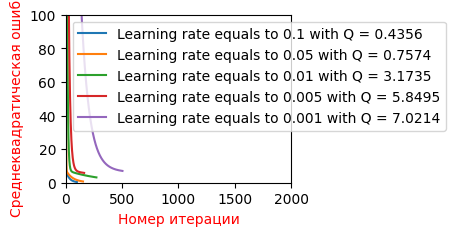

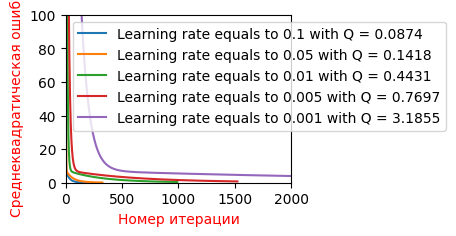

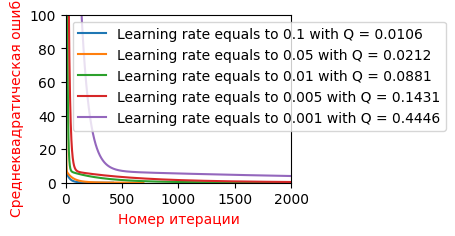

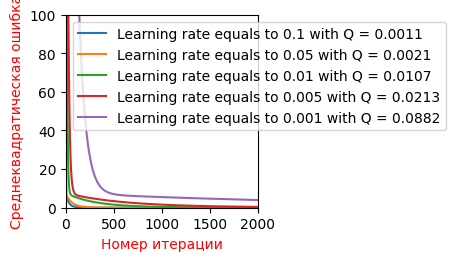

In [106]:
fig = plt.figure()

fig.set_size_inches(13, 10)

"""Задать списки для итераций"""
### Your code is here 
rates = [0.1, 0.05, 0.01, 0.005, 0.001]
thresholds = [0.01, 0.001, 0.0001, 0.00001]

for i in range(len(thresholds)):
    """Задать threshold, добавить график на полонто, создать список для хранения значений функционала"""
    ### Your code is here
    threshold_1 = thresholds[i]
    fig = plt.figure()
    ax_ = fig.add_subplot(2, 2, i  + 1) 
    Q_values = []
    
    for lr in rates:
        """Создать объект модели, добавить константу, запустить обучение модели"""
        ### Your code is here
        GD = GradientDescentMse(samples=X, targets=Y,learning_rate=lr, threshold = threshold_1)
        GD.add_constant_feature()
        GD.learn()
        
        """Определить learning_path через атрибут iteration_loss_dict"""
        ### Your code is here
        learning_path = GD.iteration_loss_dict
        plt.plot(learning_path.keys(), learning_path.values())
        
        """Отобразить learning_path на графике"""
        ### Your code is here
        plt.ylim(0, 100)
        plt.xlim(0, 2000)
        
        Q_values.append(str(round(list(learning_path.values())[-1], ndigits=4)))
    
    plt.ylabel('Среднеквадратическая ошибка', color='red')
    plt.xlabel('Номер итерации', color='red')
    plt.legend([f'Learning rate equals to {rates[i]}' + ' with Q = ' + Q_values[i] for i in range(len(rates))])

fig.tight_layout() 

plt.show()

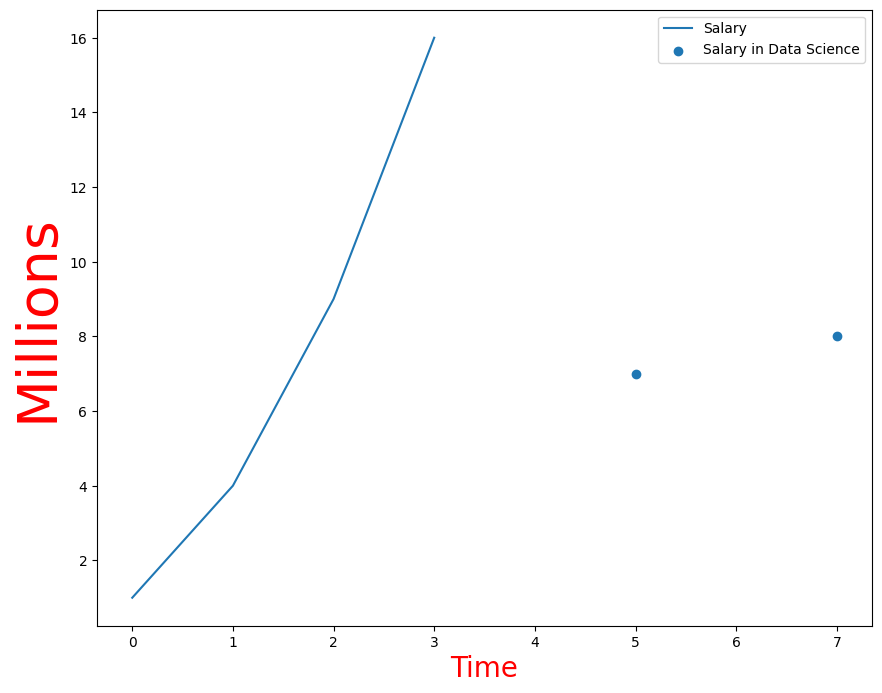

In [100]:
import matplotlib.pyplot as plt

fig = plt.figure()  # создаем канвас
fig.set_size_inches(10, 8)  # задаем размер
plt.plot([1, 4, 9, 16])  # создаем график, где по оси X будут идти индексы элементов списка, а по оси Y - элементы списка
plt.scatter([5, 7], [7, 8])  # создание графика точек с координатами X и Y

# Задать параметры осей и добавить легенду до plt.show()
plt.xlabel('Time', fontsize=20, color='red')  # задать параметры оси X
plt.ylabel('Millions', fontsize=40, color='red')  # задать параметры оси Y
plt.legend(['Salary', 'Salary in Data Science', 'Just dots'])  # добавить легенду

plt.show()  # показать график

